# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 95.9MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd
df = pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'],index_col='date_time')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [3]:
df.sample(5)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-02-02 11:00:00,4932.0,255.22,0.00,0.0,1,Clear,sky is clear
2017-08-30 10:00:00,4898.0,294.72,0.00,0.0,1,Clear,sky is clear
2017-10-26 21:00:00,3761.0,275.68,0.00,0.0,90,Rain,light rain
2018-09-02 23:00:00,1475.0,292.83,0.25,0.0,1,Mist,mist
2017-02-14 14:00:00,5098.0,275.46,0.00,0.0,36,Clouds,scattered clouds


In [4]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [6]:
# handling missing value in traffic_volume
df['traffic_volume'] = df['traffic_volume'].fillna(df['traffic_volume'].mean())

In [7]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


<Axes: xlabel='date_time'>

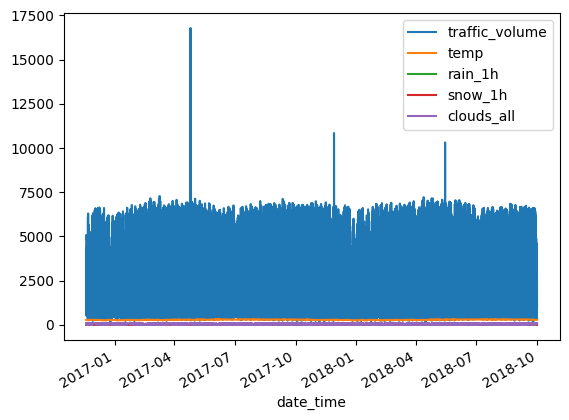

In [8]:
#plot timseries data
df.plot()

<Axes: xlabel='date_time'>

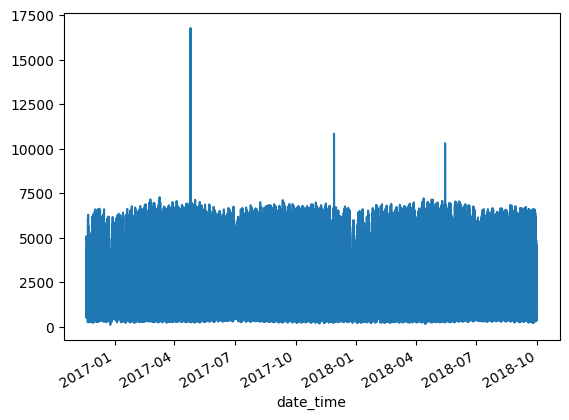

In [9]:
df['traffic_volume'].plot()

##Boxplot

<Axes: ylabel='traffic_volume'>

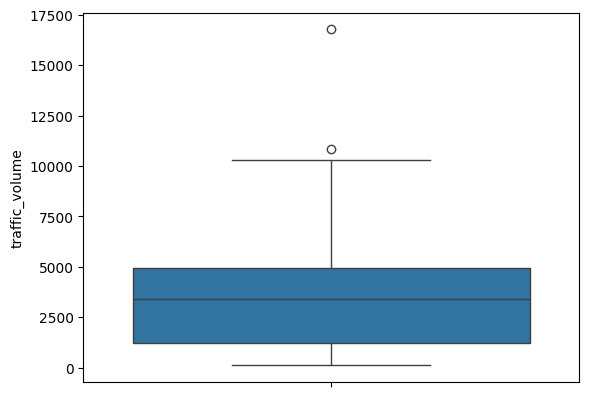

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['traffic_volume'])

<Axes: ylabel='temp'>

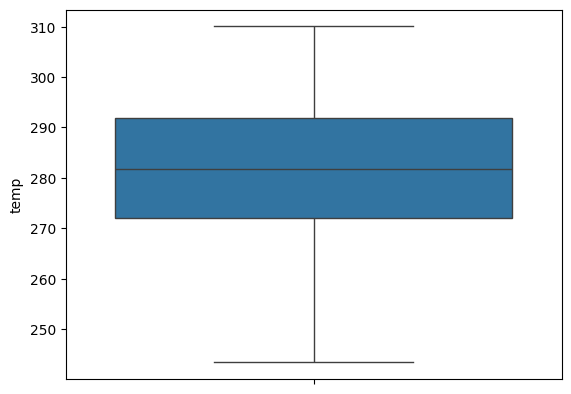

In [11]:
sns.boxplot(df['temp'])

<Axes: ylabel='rain_1h'>

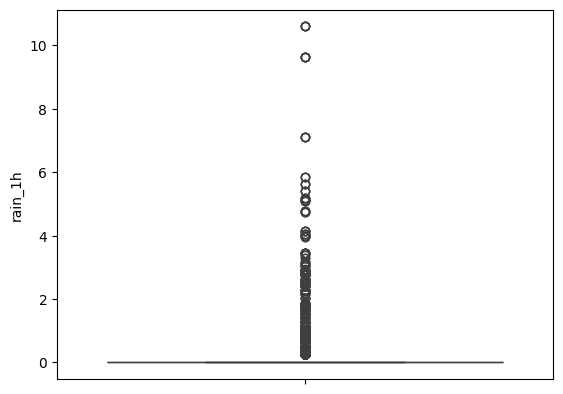

In [12]:
sns.boxplot(df['rain_1h'])

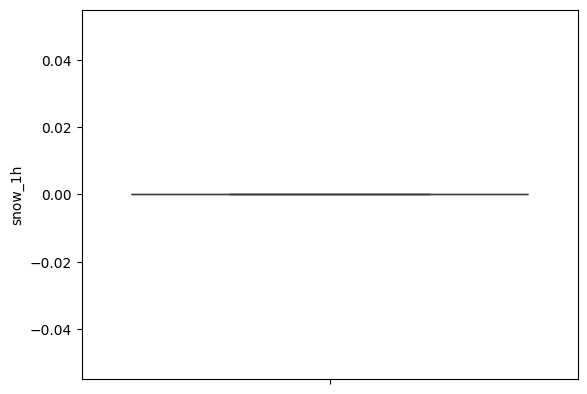

In [13]:
sns.boxplot(df['snow_1h'])
plt.show()

In [14]:
df['snow_1h'].value_counts() ## ----> drop the column

,count
snow_1h,
0.0,20000


In [15]:
df['rain_1h'].value_counts()

,count
rain_1h,
0.00,19287
0.25,269
1.78,68
1.02,29
2.79,17
...,...
2.88,2
0.30,2
3.94,2


<Axes: ylabel='clouds_all'>

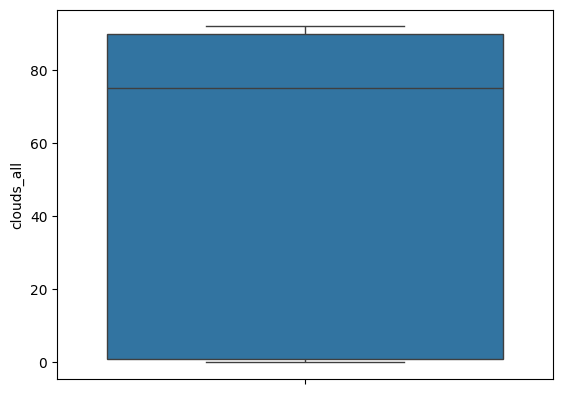

In [16]:
sns.boxplot(df['clouds_all'])



##Remove Outliers


In [17]:
# def remove_outliers(df,col):
#     Q3 = df[col].quantile(0.75)
#     Q1 = df[col].quantile(0.25)
#     IQR = Q3 -Q1

#     upper = Q3 +1.5 *IQR
#     lower = Q1 - 1.5 * IQR

#     return df[(df[col]<= upper )&(df[col]>= lower)]

In [18]:
# df = remove_outliers(df,'rain_1h')

In [19]:
# sns.boxplot(df['rain_1h'])

In [ ]:
# df['rain_1h'].value_counts()

,count
rain_1h,
0.0,19287


### all 'rain_1h' values become zero so, we don't need to remove outliers


## Seasonal decompose

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
ressult = seasonal_decompose(df['traffic_volume'],period=40)

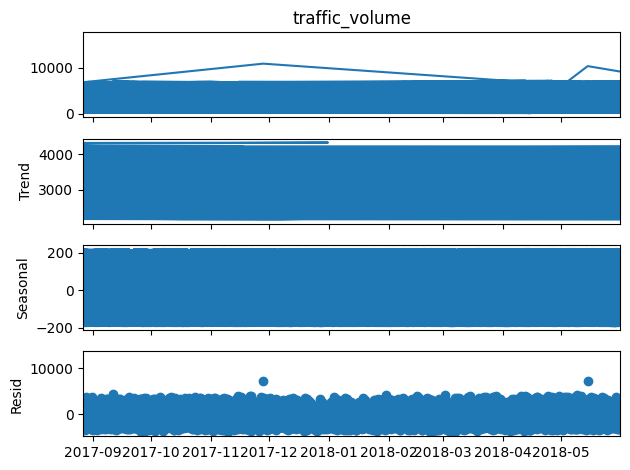

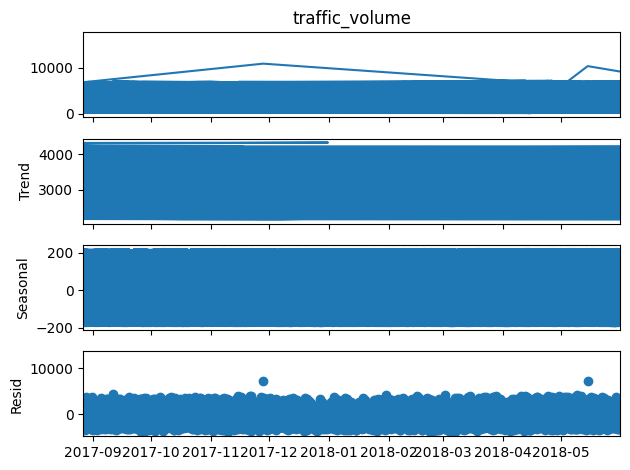

In [21]:
ressult.plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [22]:
df.sample(6)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-04-10 13:00:00,4778.0,279.62,0.00,0.0,90,Rain,light rain
2016-12-12 11:00:00,4321.0,256.33,0.00,0.0,75,Haze,haze
2017-06-28 12:00:00,4891.0,292.75,0.00,0.0,90,Drizzle,light intensity drizzle
2018-01-13 06:00:00,1175.0,249.46,0.00,0.0,1,Clear,sky is clear
2018-08-28 17:00:00,5716.0,291.01,0.25,0.0,75,Rain,light rain
2017-07-25 17:00:00,6022.0,300.22,0.00,0.0,90,Clouds,overcast clouds


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [23]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [24]:
df['prev_traffic_volume'].isna().sum()

1

In [25]:
 df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(method='bfill')

<ipython-input-25-22ad8fe4b777>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(method='bfill')


In [26]:
# Difference between traffic_volume:

df['Difference between traffic_volume'] = df['traffic_volume'].diff()

In [27]:
 df['Difference between traffic_volume'] = df['Difference between traffic_volume'].fillna(method='bfill')

<ipython-input-27-b6718584286b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Difference between traffic_volume'] = df['Difference between traffic_volume'].fillna(method='bfill')


In [28]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Difference between traffic_volume
date_time,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,1209.0,39.0
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,39.0
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,3354.0
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,-1764.0
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2956.0
...,...,...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,-3878.0
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,3172.0
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,-4763.0


In [29]:
# Date Features
df.reset_index(inplace=True) # to extract dates varible first reset index then set index

In [30]:
df

,date_time,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Difference between traffic_volume
0,2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,1209.0,39.0
1,2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,39.0
2,2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,3354.0
3,2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,-1764.0
4,2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2956.0
...,...,...,...,...,...,...,...,...,...,...
19995,2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,-3878.0
19996,2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,3172.0
19997,2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,-4763.0
19998,2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,1132.0,4393.0


In [ ]:
# Day of the week: To capture weekly seasonality.
# Month: To capture monthly trends.
# Day of the year: Useful for modeling yearly seasonality.

In [31]:
df['Day_of_the_week'] = df['date_time'].dt.dayofweek

In [32]:
df['Month'] = df['date_time'].dt.month

In [33]:
df['Day_of_year']= df['date_time'].dt.dayofyear

In [34]:
df

,date_time,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Difference between traffic_volume,Day_of_the_week,Month,Day_of_year
0,2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,1209.0,39.0,6,8,239
1,2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,39.0,3,9,249
2,2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,3354.0,4,8,237
3,2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,-1764.0,3,11,313
4,2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2956.0,3,11,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,-3878.0,2,6,157
19996,2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,3172.0,2,10,298
19997,2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,-4763.0,2,3,87
19998,2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,1132.0,4393.0,0,2,43


In [35]:
df.drop(columns='snow_1h',inplace=True)

In [36]:
df['weather_description'].value_counts()

,count
weather_description,
sky is clear,5514
mist,2758
overcast clouds,1738
broken clouds,1574
scattered clouds,1458
light snow,1247
light rain,1201
moderate rain,747
haze,672


In [37]:
df['weather_main'].value_counts()

,count
weather_main,
Clear,5614
Clouds,5234
Mist,2758
Rain,2244
Snow,1462
Drizzle,993
Haze,672
Thunderstorm,542
Fog,478


In [38]:
df.drop(columns='weather_description',inplace=True)

In [39]:
df.set_index('date_time',inplace=True)

In [40]:

df.head()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,prev_traffic_volume,Difference between traffic_volume,Day_of_the_week,Month,Day_of_year
date_time,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,90,Mist,1209.0,39.0,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.0,1,Clear,1209.0,39.0,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.0,75,Clouds,1248.0,3354.0,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.0,1,Clear,4602.0,-1764.0,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.0,5,Clear,2838.0,2956.0,3,11,313


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [41]:
  df.index

DatetimeIndex(['2017-08-27 01:00:00', '2018-09-06 23:00:00',
               '2017-08-25 18:00:00', '2017-11-09 22:00:00',
               '2017-11-09 15:00:00', '2018-06-09 12:00:00',
               '2018-07-26 19:00:00', '2018-08-03 15:00:00',
               '2018-01-10 20:00:00', '2018-08-09 00:00:00',
               ...
               '2017-09-05 05:00:00', '2018-04-06 11:00:00',
               '2018-08-03 23:00:00', '2017-08-10 02:00:00',
               '2017-03-21 07:00:00', '2018-06-06 21:00:00',
               '2017-10-25 15:00:00', '2018-03-28 23:00:00',
               '2018-02-12 15:00:00', '2018-05-31 18:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)

In [42]:
df.sort_index(inplace=True)

In [43]:
df.index

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 15:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)

In [44]:
df.shape

(20000, 10)

In [ ]:
# train1 = df.loc['2016-11-18':'2017-11-18'] ##--->one yaer
# test1 = df.loc['2017-11-19':'2017-4-20']## 6 months
# val1 = df.loc['2017-4-21':]## 6month

In [ ]:
len(train1)

10880

In [ ]:
len(test1)

0

In [ ]:
# test1

,traffic_volume,temp,rain_1h,clouds_all,weather_main,prev_traffic_volume,Difference between traffic_volume,Day_of_the_week,Month,Day_of_year
date_time,,,,,,,,,,


In [ ]:
# len(val1)

15294

In [ ]:
# 20000 rows × 10 columns

In [ ]:
train = df.iloc[0:10000]

In [ ]:
train.tail()

,traffic_volume,temp,rain_1h,clouds_all,weather_main,prev_traffic_volume,Difference between traffic_volume,Day_of_the_week,Month,Day_of_year
date_time,,,,,,,,,,
2017-10-21 04:00:00,436.0,290.58,0.0,1,Clear,2126.0,-1690.0,5,10,294
2017-10-21 05:00:00,788.0,290.22,0.0,1,Rain,2381.0,-1593.0,5,10,294
2017-10-21 06:00:00,1248.0,290.22,0.0,75,Clouds,4588.0,-3340.0,5,10,294
2017-10-21 07:00:00,1759.0,290.28,0.0,90,Rain,4966.0,-3207.0,5,10,294
2017-10-21 07:00:00,1759.0,290.28,0.0,90,Thunderstorm,5965.0,-4206.0,5,10,294


In [ ]:
#train.shape

(10001, 10)

In [ ]:
#test = df.iloc[10001:7501]

In [ ]:
#test.shape

(0, 10)

In [ ]:
#val = df.iloc[7501:2]

In [ ]:
#val.shape

(12499, 10)

In [ ]:
#15000/2

7500.0

In [ ]:
10001 +7500

17501

In [47]:
df.iloc[9999]

,2017-10-21 07:00:00
traffic_volume,1759.0
temp,290.28
rain_1h,0.0
clouds_all,90
weather_main,Thunderstorm
prev_traffic_volume,5965.0
Difference between traffic_volume,-4206.0
Day_of_the_week,5
Month,10
Day_of_year,294


In [49]:
df.iloc[0]

,2016-11-18 15:00:00
traffic_volume,4872.0
temp,274.08
rain_1h,0.0
clouds_all,90
weather_main,Snow
prev_traffic_volume,3403.0
Difference between traffic_volume,1469.0
Day_of_the_week,4
Month,11
Day_of_year,323


In [52]:
df.iloc[10000]

,2017-10-21 08:00:00
traffic_volume,2651.0
temp,289.16
rain_1h,0.0
clouds_all,90
weather_main,Mist
prev_traffic_volume,4957.0
Difference between traffic_volume,-2306.0
Day_of_the_week,5
Month,10
Day_of_year,294


In [53]:
df.iloc[14999]

,2018-04-13 21:00:00
traffic_volume,2158.0
temp,273.79
rain_1h,0.0
clouds_all,90
weather_main,Mist
prev_traffic_volume,922.0
Difference between traffic_volume,1236.0
Day_of_the_week,4
Month,4
Day_of_year,103


In [56]:
df.iloc[15000]

,2018-04-13 21:00:00
traffic_volume,2158.0
temp,273.79
rain_1h,0.0
clouds_all,90
weather_main,Drizzle
prev_traffic_volume,4224.0
Difference between traffic_volume,-2066.0
Day_of_the_week,4
Month,4
Day_of_year,103


In [50]:
train2 = df.loc['2016-11-18 15:00:00':'2017-10-21 07:00:00']

In [51]:
train2.shape

(10000, 10)

In [54]:
test2 = df.loc['2017-10-21 08:00:00':'2018-04-13 21:00:00']

In [55]:
test2.shape

(5003, 10)

In [58]:
val2 = df.loc['2018-04-13 21:00:00':]

In [59]:
val2.shape

(5002, 10)

In [62]:
cat_train = train2.select_dtypes(exclude='number')
num_train = train2.select_dtypes(include='number')

In [63]:
cat_test = test2.select_dtypes(exclude='number')
num_test = test2.select_dtypes(include='number')

In [64]:
cat_val = val2.select_dtypes(exclude='number')
num_val = val2.select_dtypes(include='number')

In [67]:
num_val.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'clouds_all',
       'prev_traffic_volume', 'Difference between traffic_volume',
       'Day_of_the_week', 'Month', 'Day_of_year'],
      dtype='object')

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [106]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline

pipe = Pipeline([('scaler',MinMaxScaler()),('onehot',OneHotEncoder())])

In [97]:
from sklearn.pipeline import Pipeline


In [109]:
# processor_pipe = pipe.fit([
#     ('cat_pipe',['weather_main']),
#     ('num_pipe',['traffic_volume', 'temp', 'rain_1h', 'clouds_all',
#        'prev_traffic_volume', 'Difference between traffic_volume',
#        'Day_of_the_week', 'Month', 'Day_of_year'])

# ])
processor_pipe = pipe.make_pipeline([('cat_pipe', ['weather_main'],'scaler',OneHotEncoder()),
                ('num_pipe', ['traffic_volume', 'temp', 'rain_1h', 'clouds_all',
       'prev_traffic_volume', 'Difference between traffic_volume',
       'Day_of_the_week', 'Month', 'Day_of_year'],'onehot',MinMaxScaler())])

AttributeError: 'Pipeline' object has no attribute 'make_pipeline'

In [83]:
train = processor_pipe.fit_transform(train2)

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [84]:
test = processor_pipe.transform(test2)

AttributeError: This 'Pipeline' has no attribute 'transform'

In [85]:
val = processor_pipe.transform(val2)

AttributeError: This 'Pipeline' has no attribute 'transform'

In [86]:
window = 30

In [ ]:
from tensotflow.keras.utils import timeseries_dataset_from_array
trainX_y = timeseries_dataset_from_array (train,targets=[window:,6],sequence_length=window)
testX_y = timeseries_dataset_from_array(test,targets=[window:,6],sequence_length=window)
valX_y = timeseries_dataset_from_array(val,targets=[window:,6],sequence_length=window)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [110]:
from tensorflow.keras.model import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,GRU

model = Sequential()

ModuleNotFoundError: No module named 'tensorflow.keras.model'

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: